# **Mini-Project on Machine Learning**

### **Subject:** IE0005 Introduction to Data Sci and Art Intell  

**Tutorial Group:** EL02 <br>
**Tutor’s Name:** Prof. Soong Boon Hee <br> 
**Date:** 14th April 2025 <br>

**Group 9:** <br>
- **Ranya Shameeta Devandran** | matric <br>
- **Yan Xiaoye** | matric<br>
- **Nguyen Nhat Quang** | matric <br>
- **Bhavya Sangal** | U2423305H<br>

## Dataset : Cardiovascular Disease Dataset
##### Source: [Cardiovascular Disease Dataset from Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

### Data Description:

The dataset consists of 70 000 records of patients data, 11 features + target

**There are 3 types of input features:**
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

**Factual Information:** <br>
Age | Objective Feature | age | int (days) <br>
Height | Objective Feature | height | int (cm) | <br>
Weight | Objective Feature | weight | float (kg) | <br>
Gender | Objective Feature | gender | categorical code | <br>

**Results of Medical Examination:** <br>
Systolic blood pressure | Examination Feature | ap_hi | int | <br>
Diastolic blood pressure | Examination Feature | ap_lo | int | <br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | <br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | <br>

**Information given by the patient:** <br>
Smoking | Subjective Feature | smoke | binary | <br>
Alcohol intake | Subjective Feature | alco | binary | <br>
Physical activity | Subjective Feature | active | binary | <br>

**Target Varible:**<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | <br>


* All of the dataset values were collected at the moment of medical examination.

## Contents

1. [Importing Libraries](#lib)

2. [Data Pre-Processing](#data_pre)

3. [Exploratory Data Analysis and Visualuation](#visual)

    A. [Numerical Data](#num_visual)

    B. [Categorical Data](#cat_visual)

    C. [Correlation HeatMap](#corr)

5. [Feature Engineering](#feature)

6. [Data Standardization](#stand)

7. [Data Analysis](#analysis)

    A. [Decision Tree](#tree)
    
    B. [Linear Regression](#linearReg)
    
    C. [Logistic Regression](#logisticReg)
    
    D. [Random Forest](#randomForest)

    E. [Neural Network](#neuralNetowrk)

    F. [GX Boosting](#gxBoost)

    G. [Model Stacking](#stacking)

9. [Anomaly Detection](#ano_det)

In [4]:
#<a id="lib"></a>
# importing relevant libraries
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Polygon
import seaborn as sb
sb.set()

#Data Analysis
#Feature Engineering
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Data Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

#Liner Regression
from sklearn.linear_model import LinearRegression

#Logistic Regression
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold  # Import RandomizedSearchCV and distributions for sampling
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

#GX Boost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import StackingClassifier

In [5]:
# displaying the data 
cardio = pd.read_csv('cardio_train.csv', sep=";") #separated by colons instead of commas so you have to separate it manually
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<a id="data_pre"></a>
## Data Preprocessing
#### Data preprocessing is the process of cleaning, transforming, and organizing the cardiovascular dataset to ensure accuracy, consistency, and relevance for meaningful analysis and model training.

Why we need to process the data:
- Removes errors and unrealistic values that can mislead the model
- Makes the dataset easier to work with and understand
- Ensures consistency across values and units
- Improves the performance and accuracy of machine learning models
- Prevents the model from learning from noise or incorrect patterns

Steps we took and Why:
- Removed all NaN (missing) values to avoid crashes and false results
- Dropped duplicate rows to prevent bias from repeated data
- Converted height from cm to meters for correct BMI calculation
- Converted age from days to rounded years for meaningful interpretation
- Created BMI column as a more relevant health indicator
- Checked if BMI values were within realistic human range
- Verified ap_hi (systolic) and ap_lo (diastolic) blood pressure values to ensure they are scientifically valid

In [6]:
# removing all incorrect values of NAN or duplicates to ensure a clean dataset

cardio = cardio.dropna() #drop NaN (not a number) values
cardio = cardio.drop_duplicates() #drop duplicate values

for col in cardio.columns:
    print('\t%s: %d' % (col,cardio[col].isna().sum())) #checking for NaN values

dups = cardio.duplicated()
print('\nNumber of duplicate rows = %d' % (dups.sum())) #checking for duplicated rows

	id: 0
	age: 0
	gender: 0
	height: 0
	weight: 0
	ap_hi: 0
	ap_lo: 0
	cholesterol: 0
	gluc: 0
	smoke: 0
	alco: 0
	active: 0
	cardio: 0

Number of duplicate rows = 0


In [7]:
# changing height into m for easier calculation of BMI

print(cardio['height'].value_counts())
cardio['height'] = (cardio['height']/100) #changing height into m from cm
print('\n')
print(cardio['height'].value_counts())

height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: count, Length: 109, dtype: int64


height
1.65    5853
1.60    5022
1.70    4679
1.68    4399
1.64    3396
        ... 
1.12       1
0.98       1
0.74       1
1.19       1
0.57       1
Name: count, Length: 109, dtype: int64


In [8]:
# displaying age in years for easier understanding

print(cardio['age'].value_counts())
print('\n')
cardio['age'] = (cardio['age']/365).round().astype(int) # changing age into years (rounded values) from days
print(cardio['age'].value_counts())

age
19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: count, Length: 8076, dtype: int64


age
56    6031
54    5988
58    5702
60    5465
52    5303
50    5267
62    3926
64    3920
48    3194
46    2955
44    2837
40    2700
42    2624
55    1498
57    1452
53    1407
59    1355
51    1348
61    1221
49    1059
63    1016
41     766
45     757
47     754
43     690
39     409
65     352
30       4
Name: count, dtype: int64


In [9]:
# displaying gender as F and M for easier understanding

print(cardio['gender'].value_counts())
cardio['gender'] = cardio['gender'].replace({1:'F', 2:'M'}) #changing gender to F and M from 1 and 2
print('\n')
print(cardio['gender'].value_counts())

gender
1    45530
2    24470
Name: count, dtype: int64


gender
F    45530
M    24470
Name: count, dtype: int64


Original BMI value counts:

BMI
23.875115    943
23.437500    651
24.221453    489
25.711662    363
22.038567    358
            ... 
25.755158      1
49.077930      1
17.102915      1
16.613267      1
50.472681      1
Name: count, Length: 3808, dtype: int64


                BMI
count  70000.000000
mean      27.556513
std        6.091511
min        3.471784
25%       23.875115
50%       26.374068
75%       30.222222
max      298.666667


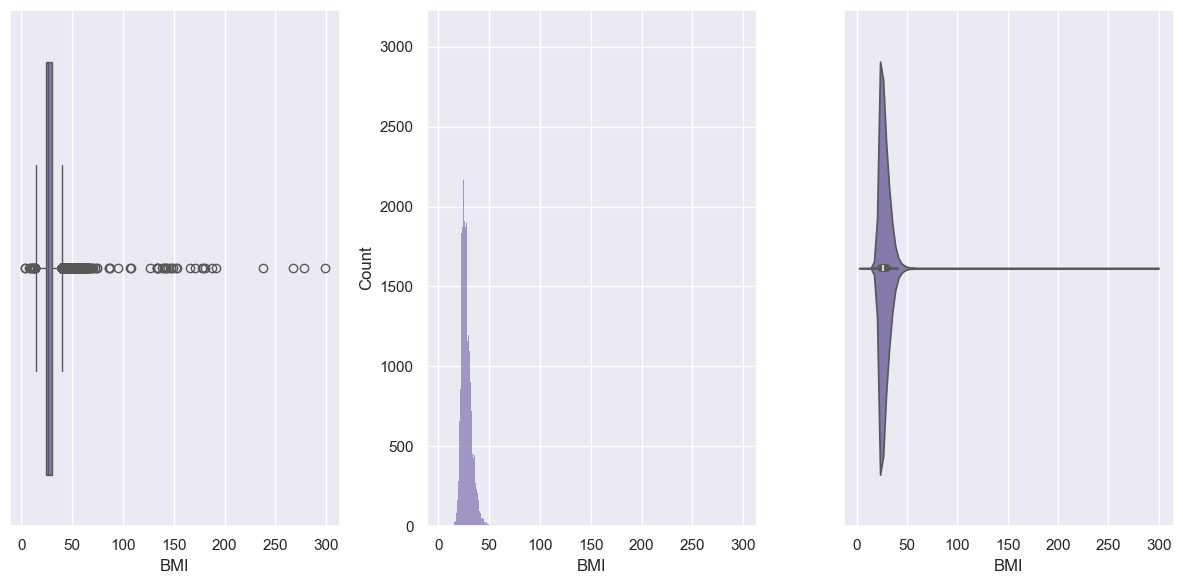

In [10]:
# use height and weight to calculate BMI as it is more relevant for scientific analysis
cardio['BMI'] = cardio['weight'] / ((cardio['height']) ** 2)

# inspect the original data of BMI
print("Original BMI value counts:\n")
print(cardio['BMI'].value_counts())

print('\n')
print(cardio[['BMI']].describe())

# visualing BMI to check for outliers
bmi = cardio['BMI']
f, axes = plt.subplots(1, 3, figsize=(12,6))
sb.boxplot(bmi, orient='h', ax=axes[0], color='m')
sb.histplot(bmi, kde=False, ax=axes[1], color='m')
sb.violinplot(bmi, ax=axes[2], orient='h', color='m')
plt.tight_layout()

Original ap_hi value counts:
ap_hi
 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: count, Length: 153, dtype: int64

Original ap_lo value counts:
ap_lo
80     34847
90     14316
70     10245
100     4082
60      2727
       ...  
56         1
182        1
810        1
9          1
602        1
Name: count, Length: 157, dtype: int64


Text(0.5, 1.0, 'Scatter Plot: ap_hi vs. ap_lo')

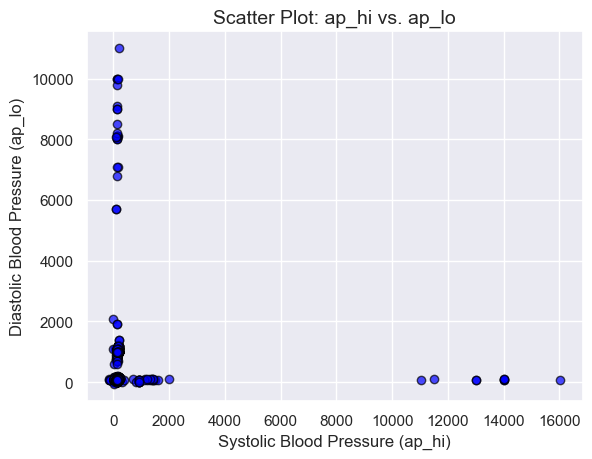

In [11]:
# Inspect the original data for ap_hi and ap_lo
print("Original ap_hi value counts:")
print(cardio['ap_hi'].value_counts())

print("\nOriginal ap_lo value counts:")
print(cardio['ap_lo'].value_counts())

# original visualisation of ap_hi against ap_lo
plt.scatter(cardio['ap_hi'], cardio['ap_lo'], alpha=0.7, color='blue', edgecolor='black')

plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('Diastolic Blood Pressure (ap_lo)', fontsize=12)
plt.title('Scatter Plot: ap_hi vs. ap_lo', fontsize=14)

In [12]:
# Define valid ranges for ap_hi, ap_lo, and BMI
valid_ranges = {
    'ap_hi': (50, 250),
    'ap_lo': (20, 250),
    'BMI': (10, 100)
}

# Create Boolean conditions for valid rows
valid_condition = (
    (cardio['ap_hi'] >= valid_ranges['ap_hi'][0]) & (cardio['ap_hi'] <= valid_ranges['ap_hi'][1]) &
    (cardio['ap_lo'] >= valid_ranges['ap_lo'][0]) & (cardio['ap_lo'] <= valid_ranges['ap_lo'][1]) &
    (cardio['BMI'] >= valid_ranges['BMI'][0]) & (cardio['BMI'] <= valid_ranges['BMI'][1])
)

# Filter the DataFrame
cardio_filtered = cardio[valid_condition]

# Reset index after filtering, dropping the old index
cardio_filtered = cardio_filtered.reset_index(drop=True)

# Display the filtered DataFrame
print("Filtered DataFrame:")
cardio_filtered

Filtered DataFrame:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,M,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,F,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,F,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,M,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,F,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68758,99993,53,M,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
68759,99995,62,F,1.58,126.0,140,90,2,2,0,0,1,1,50.472681
68760,99996,52,M,1.83,105.0,180,90,3,1,0,1,0,1,31.353579
68761,99998,61,F,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


Text(0.5, 1.0, 'Scatter Plot: ap_hi vs. ap_lo')

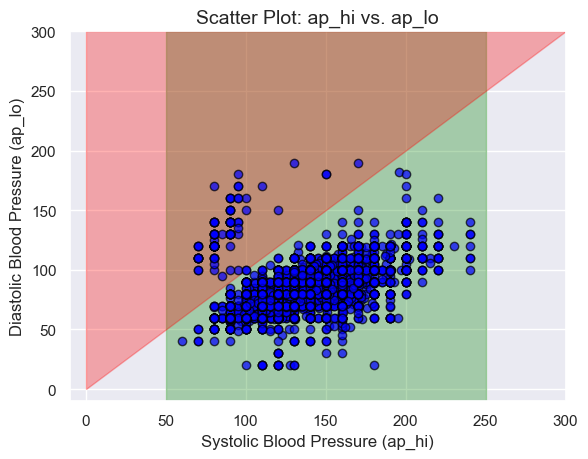

In [13]:
# displaying the filtered values of ap_hi and ap_lo and checking for accuracy as ap_hi cannot be lower than ap_lo

plt.xlim(-10, 300)  # Limit systolic values (x-axis) on scatterplot
plt.ylim(-10, 300)   # Limit diastolic values (y-axis) on scatterplot

# Add green section (safe range example)
plt.axvspan(50, 250, color='green', alpha=0.3, label='Safe Range (ap_hi)')

# Create and add the triangle patch, which represents the outliers as ap_hi must be higher than ap_lo
triangle_coords = [(0, 0), (0, 300), (300, 300)]  # Three points of the triangle
triangle = Polygon(triangle_coords, color='red', alpha=0.3, label='Risk Zone')
plt.gca().add_patch(triangle)

# new visualisation of ap_hi against ap_lo
plt.scatter(cardio_filtered['ap_hi'], cardio_filtered['ap_lo'], alpha=0.7, color='blue', edgecolor='black')

plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('Diastolic Blood Pressure (ap_lo)', fontsize=12)
plt.title('Scatter Plot: ap_hi vs. ap_lo', fontsize=14)

Text(0.5, 1.0, 'Scatter Plot: Filtered ap_hi vs. Filtered ap_lo')

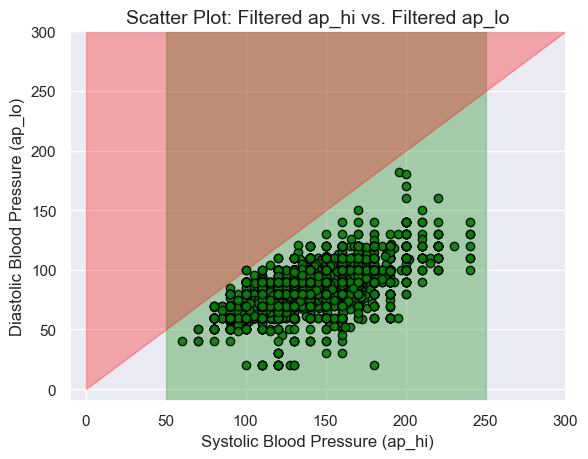

In [14]:
# filtering out all the values from the red danger region to ensure it is accurate

plt.xlim(-10, 300)  # Limit systolic values (x-axis) on scatterplot
plt.ylim(-10, 300)   # Limit diastolic values (y-axis) on scatterplot

# Add green section (safe range example)
plt.axvspan(50, 250, color='green', alpha=0.3, label='Safe Range (ap_hi)')

# Create and add the triangle patch, which represents the outliers
triangle_coords = [(0, 0), (0, 300), (300, 300)]  # Three points of the triangle
triangle = Polygon(triangle_coords, color='red', alpha=0.3, label='Risk Zone')
plt.gca().add_patch(triangle)

# Define triangle coordinates for the red section for filtering of data
triangle_coords = np.array([(0, 0), (0, 300), (300, 300)])  # Vertices of the triangle

# Function to check if a point is inside the triangle
def is_inside_triangle(point, triangle):
    from matplotlib.path import Path
    polygon = Path(triangle)
    return polygon.contains_point(point)

# Create a Boolean mask for filtering
mask = cardio_filtered.apply(lambda row: is_inside_triangle((row['ap_hi'], row['ap_lo']), triangle_coords), axis=1)

# Filter the DataFrame: Keep only rows where mask is False (i.e., not inside the triangle)
cardio_new = cardio_filtered[~mask].reset_index(drop=True)

plt.scatter(cardio_new['ap_hi'], cardio_new['ap_lo'], alpha=0.9, color='green', edgecolor='black', label='Filtered Data')
plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('Diastolic Blood Pressure (ap_lo)', fontsize=12)
plt.title('Scatter Plot: Filtered ap_hi vs. Filtered ap_lo', fontsize=14)

In [15]:
# display the filtered DataFrame that will be used for analysis
print("Filtered DataFrame (All Columns Retained):")
cardio_new

Filtered DataFrame (All Columns Retained):


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,M,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,F,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,F,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,M,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,F,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68657,99993,53,M,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
68658,99995,62,F,1.58,126.0,140,90,2,2,0,0,1,1,50.472681
68659,99996,52,M,1.83,105.0,180,90,3,1,0,1,0,1,31.353579
68660,99998,61,F,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


In [13]:
cardio_new.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000
mean,49974.535172,53.327226,1.643956,74.112186,126.671216,81.289986,1.364641,1.225743,0.087923,0.053319,0.803385,0.494742,27.468027
std,28846.148321,6.767570,0.079924,14.288635,16.692784,9.505539,0.678849,0.571595,0.283186,0.224671,0.397442,0.499976,5.289850
min,0.000000,30.000000,0.760000,28.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,25002.250000,48.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50016.500000,54.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,74868.750000,58.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,99999.000000,65.000000,2.500000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,95.221607


In [14]:
cardio_visualise = cardio_new.drop(columns=["id","cardio", "gender"])
cardio_visualise.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
count,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000,68662.000000
mean,53.327226,1.643956,74.112186,126.671216,81.289986,1.364641,1.225743,0.087923,0.053319,0.803385,27.468027
std,6.767570,0.079924,14.288635,16.692784,9.505539,0.678849,0.571595,0.283186,0.224671,0.397442,5.289850
min,30.000000,0.760000,28.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.726644
25%,48.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.875115
50%,54.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.346494
75%,58.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.119376
max,65.000000,2.500000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,95.221607


<a id="visual"></a>
## Visualisation of Data
### Data visualization is the use of plots and charts to understand the distribution, relationships, and patterns in the cardiovascular dataset.

Why we used data visualization:
- To identify trends and patterns between health indicators and heart disease
- To detect outliers and anomalies visually
- To compare the distribution of features like BMI, blood pressure, cholesterol
- To make complex data easier to interpret and explain

What we did:
Numerical Data: 
- Plotted boxplots, histograms, and violin plots for numerical features: height, weight, BMI, and age to understand their distribution and identify outliers.
  
Categorical Data:
- Used bar graphs to show how many people smoke, consume alcohol, and are physically active.
- Also plotted the statitics for target varible i.e. people diagonsed with cardiovascular disease.
- Created pie charts to visualize the distribution of cholesterol and glucose levels across different categories.



<a id="num_visual"></a>
### Numerical Data Visualization

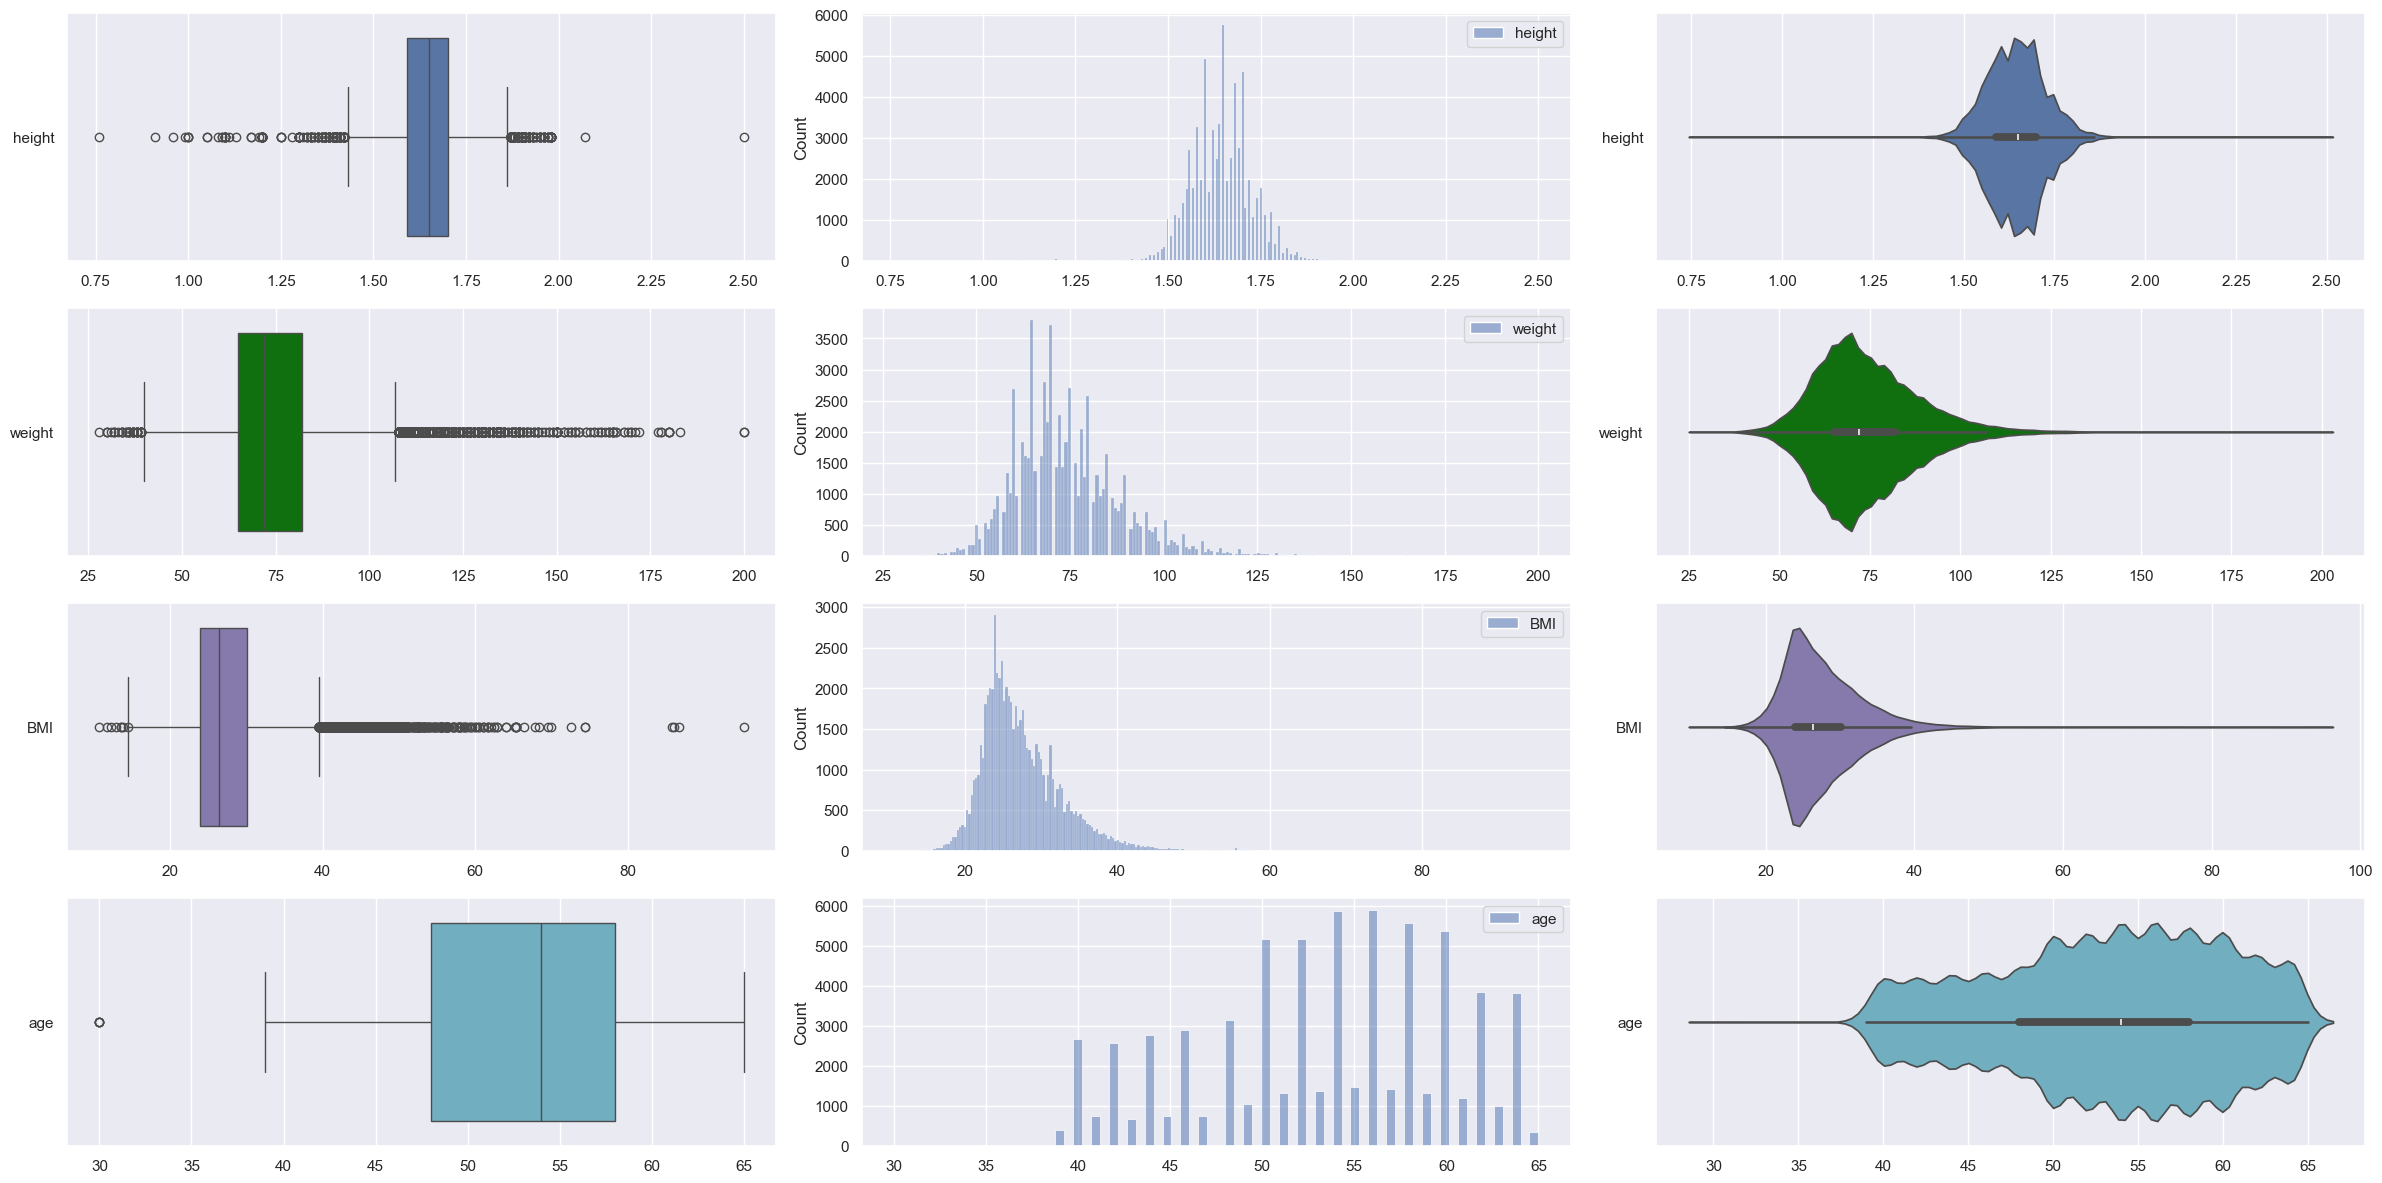

In [15]:
age = pd.DataFrame(cardio_new['age'])
height = pd.DataFrame(cardio_new['height'])
weight = pd.DataFrame(cardio_new['weight'])
bmi = pd.DataFrame(cardio_new['BMI'])

f, axes = plt.subplots(4, 3, figsize=(24,12))
sb.boxplot(height, orient='h', ax=axes[0,0])
sb.histplot(height, kde=False, ax=axes[0,1])
sb.violinplot(height, ax=axes[0,2], orient='h')

sb.boxplot(weight, orient='h', ax=axes[1,0], color='green')
sb.histplot(weight, kde=False, ax=axes[1,1], color='green')
sb.violinplot(weight, ax=axes[1,2], orient='h',color='green')

sb.boxplot(bmi, orient='h', ax=axes[2,0], color='m')
sb.histplot(bmi, kde=False, ax=axes[2,1], color='m')
sb.violinplot(bmi, ax=axes[2,2], orient='h', color='m')

sb.boxplot(age, orient='h', ax=axes[3,0], color='c')
sb.histplot(age, kde=False, ax=axes[3,1], color='c')
sb.violinplot(age, ax=axes[3,2], orient='h', color='c')

plt.tight_layout()

<a id="cat_visual"></a>
### Categorical Data Visualization

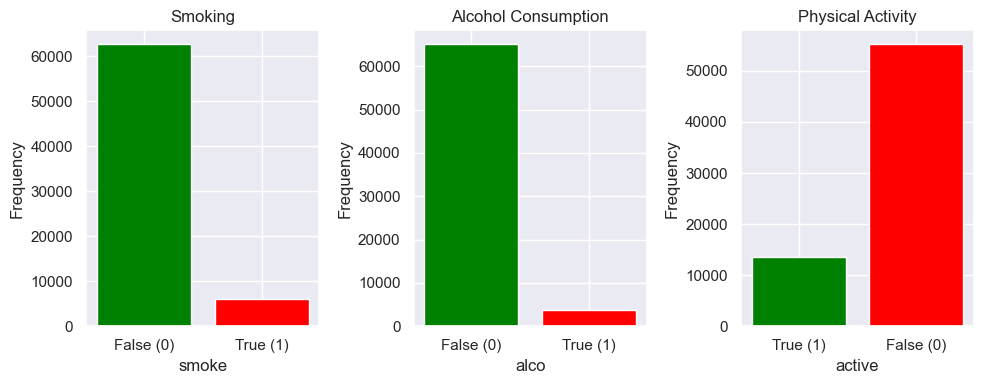

In [16]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes = axes.flatten()  # Flatten axes array for easy indexing

smoke = cardio_new['smoke'].value_counts()
axes[0].bar(smoke.index, smoke.values, color=['green', 'red'], tick_label=['False (0)', 'True (1)'])
axes[0].set_xlabel('smoke')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Smoking')

alco = cardio_new['alco'].value_counts()
axes[1].bar(alco.index, alco.values, color=['green', 'red'], tick_label=['False (0)', 'True (1)'])
axes[1].set_xlabel('alco')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Alcohol Consumption')

act = cardio_new['active'].value_counts()
axes[2].bar(act.index, act.values, color=['red', 'green'], tick_label=['False (0)', 'True (1)'])
axes[2].set_xlabel('active')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Physical Activity')

# Adjust layout to prevent overlap
plt.tight_layout()

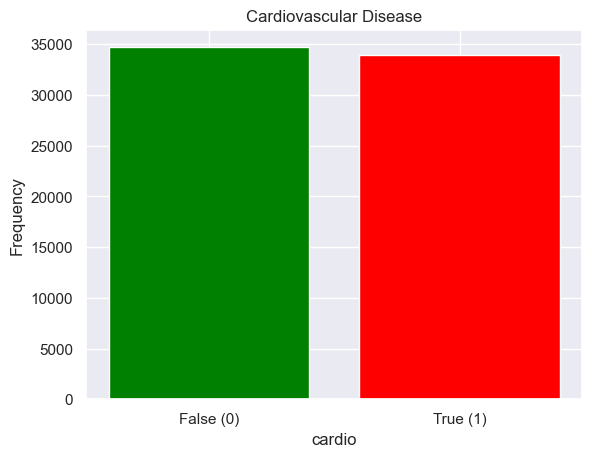

In [17]:
car = cardio_new['cardio'].value_counts()
plt.bar(car.index, car.values, color=['green', 'red'], tick_label=['False (0)', 'True (1)'])
plt.xlabel('cardio')
plt.ylabel('Frequency')
plt.title('Cardiovascular Disease')
plt.show()

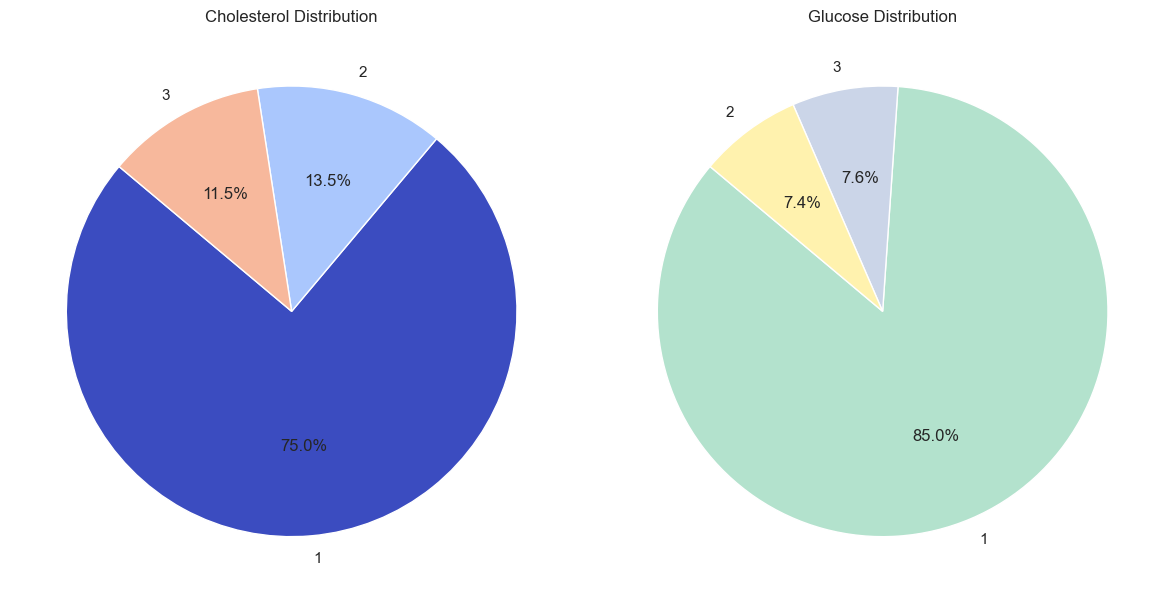

In [18]:
cholesterol_counts = cardio_new["cholesterol"].value_counts()
gluc_counts = cardio_new["gluc"].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ensure axes is treated as an array

# Generate a gradient of colors using a colormap

# Plot Cholesterol Pie Chart (Use axes[0])
axes[0].pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%', startangle=140, colors=[cm.coolwarm(i / len(cholesterol_counts)) for i in range(len(cholesterol_counts))])
axes[0].set_title("Cholesterol Distribution")

# Plot Glucose Pie Chart (Use axes[1])
axes[1].pie(gluc_counts, labels=gluc_counts.index, autopct='%1.1f%%', startangle=140, colors=[cm.Pastel2(i / len(gluc_counts)) for i in range(len(gluc_counts))])
axes[1].set_title("Glucose Distribution")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

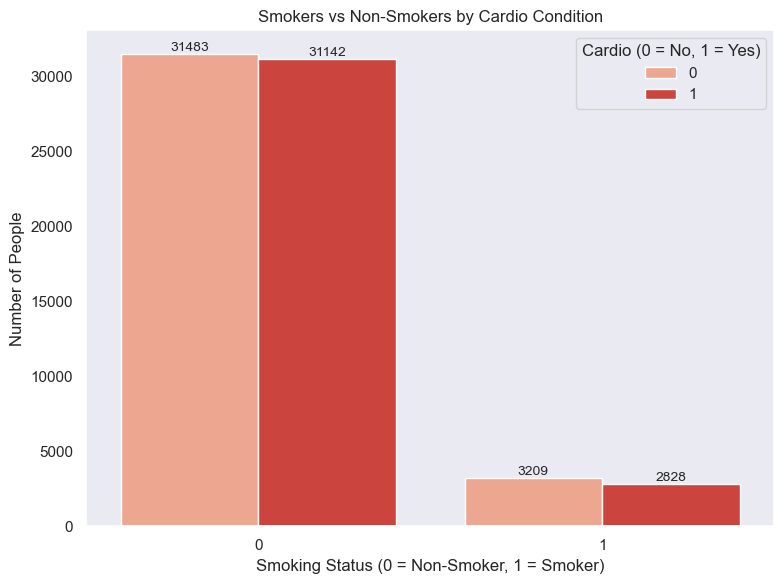

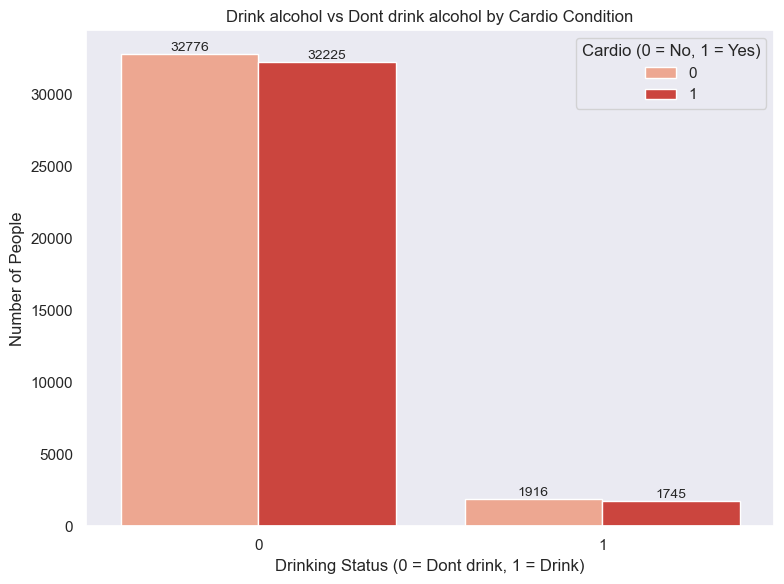

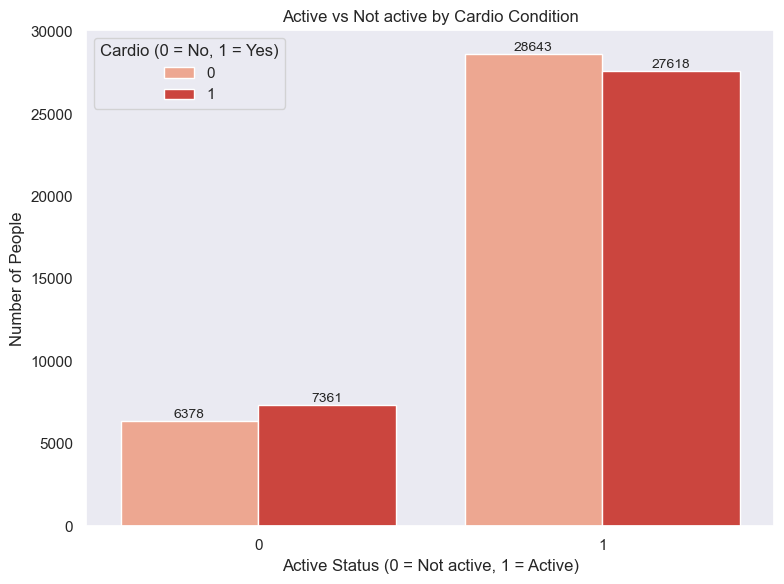

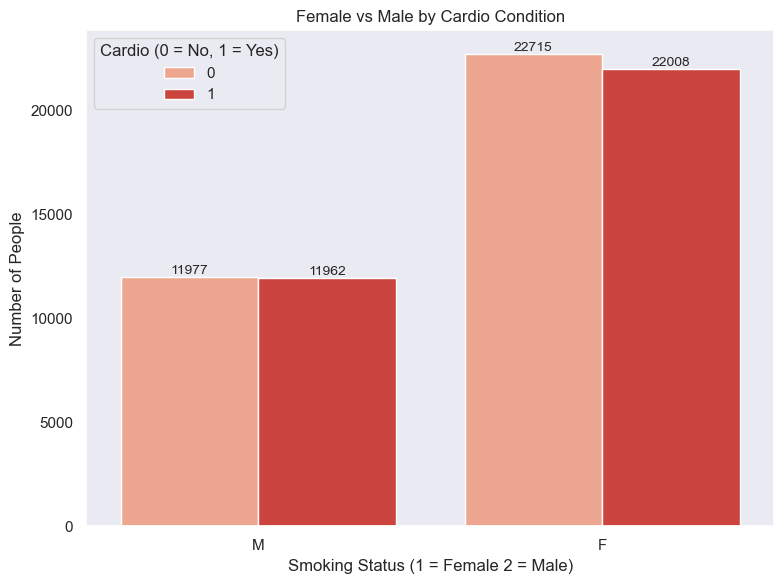

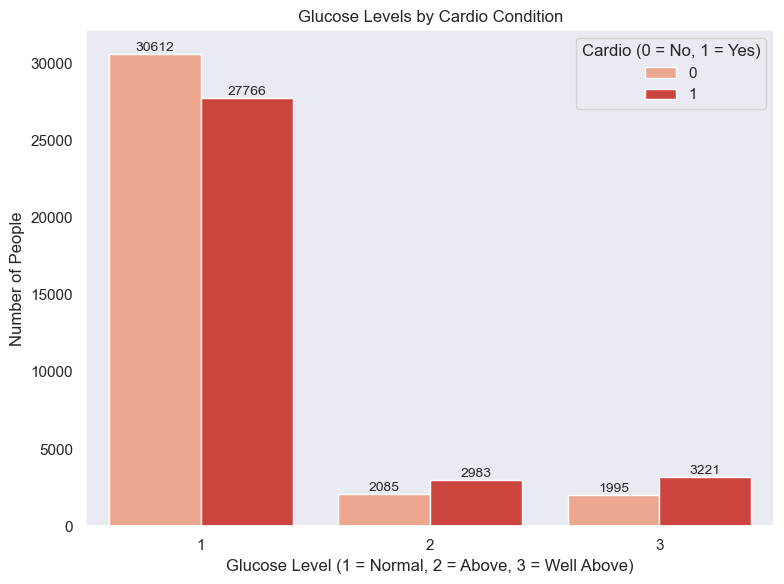

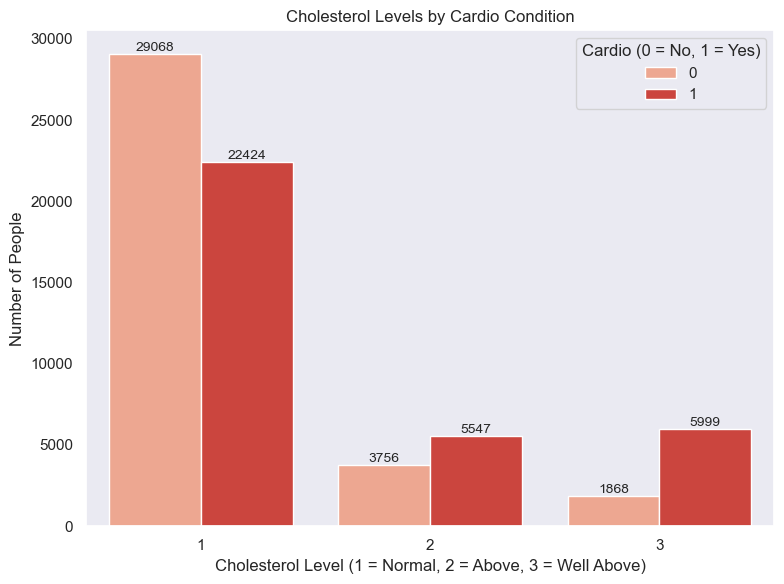

In [19]:
#Smoke
plt.figure(figsize=(8, 6))
sm=sb.countplot(data=cardio_new, x='smoke', hue='cardio', palette='Reds')

for container in sm.containers:
    sm.bar_label(container, label_type='edge', fontsize=10)
    
plt.title('Smokers vs Non-Smokers by Cardio Condition')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Number of People')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Alcohol
plt.figure(figsize=(8, 6))
al=sb.countplot(data=cardio_new, x='alco', hue='cardio', palette='Reds')

for container in al.containers:
    al.bar_label(container, label_type='edge', fontsize=10)

plt.title('Drink alcohol vs Dont drink alcohol by Cardio Condition')
plt.xlabel('Drinking Status (0 = Dont drink, 1 = Drink)')
plt.ylabel('Number of People')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Activeness
plt.figure(figsize=(8, 6))
act=sb.countplot(data=cardio, x='active', hue='cardio', palette='Reds')

for container in act.containers:
    act.bar_label(container, label_type='edge', fontsize=10)

plt.title('Active vs Not active by Cardio Condition')
plt.xlabel('Active Status (0 = Not active, 1 = Active)')
plt.ylabel('Number of People')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Gender
plt.figure(figsize=(8, 6))
gen=sb.countplot(data=cardio_new, x='gender', hue='cardio', palette='Reds')

for container in gen.containers:
    gen.bar_label(container, label_type='edge', fontsize=10)

plt.title('Female vs Male by Cardio Condition')
plt.xlabel('Smoking Status (1 = Female 2 = Male)')
plt.ylabel('Number of People')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Glucose
plt.figure(figsize=(8, 6))
gl = sb.countplot(data=cardio_new, x='gluc', hue='cardio', palette='Reds')

for container in gl.containers:
    gl.bar_label(container, label_type='edge', fontsize=10)

plt.title('Glucose Levels by Cardio Condition')
plt.xlabel('Glucose Level (1 = Normal, 2 = Above, 3 = Well Above)')
plt.ylabel('Number of People')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Cholesterol
plt.figure(figsize=(8, 6))
ax = sb.countplot(data=cardio_new, x='cholesterol', hue='cardio', palette='Reds')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Cholesterol Levels by Cardio Condition')
plt.xlabel('Cholesterol Level (1 = Normal, 2 = Above, 3 = Well Above)')
plt.ylabel('Number of People')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<a id="corr_visual"></a>
### Correlation Heatmap of all Variables

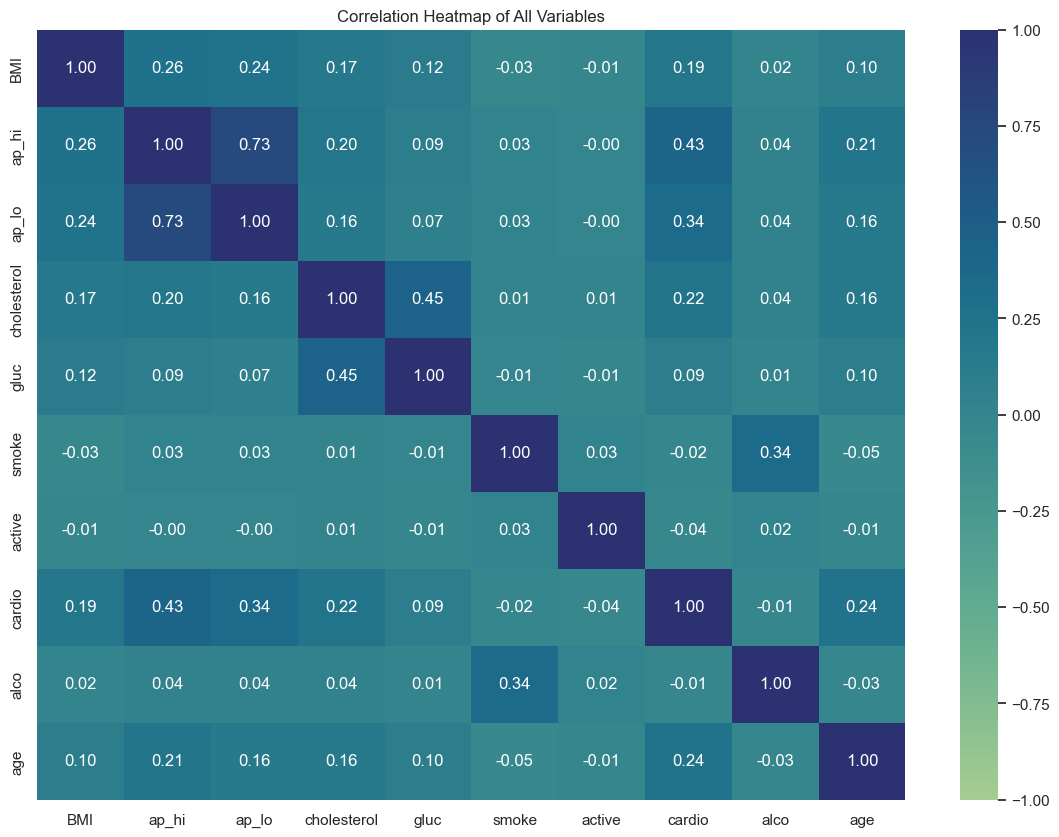

In [20]:
#correlation
X = pd.DataFrame(cardio_new[["BMI", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "active", "cardio", "alco", "age"]])
plt.figure(figsize=(14, 10))
sb.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='crest')
plt.title("Correlation Heatmap of All Variables")
plt.show()

<a id="feature"></a>
## Feature Engineering
#### Feature engineering is the process of creating or transforming variables in a dataset to help machine learning models learn patterns more effectively. </br>

What We did: 
- Calculated pulse pressure to capture blood pressure variation.  
- Computed BMI from height and weight, then categorized it into BMI classes.  
- Handled missing BMI categories by labeling them as Unknown.  
- Applied K-Means clustering on selected health features to uncover hidden patterns.  
- Scaled the data and used Elbow Method & Silhouette Scores to choose the optimal number of clusters.  
- Added the K-Means cluster label as a new feature to the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

if 'cardio_new' in locals():
    print("--- Starting Feature Engineering ---")

    # --- 1. Pulse Pressure ---
    cardio_new['pulse_pressure'] = cardio_new['ap_hi'] - cardio_new['ap_lo']
    print("Created 'pulse_pressure'.")

    # --- 2. BMI Categories ---
    bmi_bins = [0, 18.5, 25, 30, 35, 40, 60] # Example range, check max from cardio_new.describe() if needed
    bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese_I', 'Obese_II', 'Obese_III']
  
    if 'BMI' not in cardio_new.columns and 'height' in cardio_new.columns and 'weight' in cardio_new.columns:
         cardio_new['BMI'] = cardio_new['weight'] / (cardio_new['height']**2 + 1e-6)
         print("Calculated 'BMI' on cardio_new.")

    if 'BMI' in cardio_new.columns:
        cardio_new['bmi_category'] = pd.cut(cardio_new['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)
        
        cardio_new['bmi_category'] = cardio_new['bmi_category'].cat.add_categories('Unknown').fillna('Unknown')
        print("Created 'bmi_category'.")
        print("BMI Category Counts:")
        print(cardio_new['bmi_category'].value_counts())
    else:
        print("Warning: 'BMI' column not found or could not be created in cardio_new. Skipping bmi_category.")


    # --- 3. K-Means Clustering Feature ---
    # Select numerical features for clustering from cardio_new
    features_for_kmeans = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'pulse_pressure'] 
    if 'age_years' in cardio_new.columns:
         features_for_kmeans = ['age_years' if col=='age' else col for col in features_for_kmeans if col != 'age'] 
         if 'age_years' not in features_for_kmeans: features_for_kmeans.append('age_years')


    # Ensure all selected columns exist in the dataframe
    features_for_kmeans = [col for col in features_for_kmeans if col in cardio_new.columns]
    print(f"\nFeatures used for K-Means: {features_for_kmeans}")

    if features_for_kmeans: 
        kmeans_data = cardio_new[features_for_kmeans].copy()

        scaler_kmeans = StandardScaler()
        kmeans_data_scaled = scaler_kmeans.fit_transform(kmeans_data)
        print("Data scaled for K-Means.")

        # --- Determine optimal K (Elbow Method + Silhouette Score) ---
        print("\n--- Evaluating K for K-Means ---")
        wcss = []
        silhouette_scores = []
        k_range = range(2, 11) # Test K from 2 to 10

        for k in k_range:
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, verbose=0)
            kmeans.fit(kmeans_data_scaled)
            wcss.append(kmeans.inertia_)
            labels = kmeans.labels_
            if k > 1:
                 try:
                     score = silhouette_score(kmeans_data_scaled, labels)
                     silhouette_scores.append(score)
                     print(f"K={k}, Silhouette Score: {score:.4f}")
                 except Exception as e_sil:
                     print(f"Could not calculate Silhouette for K={k}: {e_sil}")
                     silhouette_scores.append(-1)
            else:
                 silhouette_scores.append(-1)

        # --- Plot Elbow Method & Silhouette Scores ---
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(k_range, wcss, marker='o')
        plt.title('Elbow Method for Optimal K')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel('WCSS (Inertia)')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        valid_k_for_silhouette = [k for i, k in enumerate(k_range) if i < len(silhouette_scores) and silhouette_scores[i] > -1]
        valid_silhouette_scores = [s for s in silhouette_scores if s > -1]
        if valid_k_for_silhouette:
            plt.plot(valid_k_for_silhouette, valid_silhouette_scores, marker='o')
        plt.title('Silhouette Scores for Optimal K')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel('Silhouette Score')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # --- Apply K-Means with optimal K ---
        optimal_k = 2
        print(f"\nSelected optimal K = {optimal_k} based on previous analysis (Silhouette Score).")

        kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42, verbose=0)
        cardio_new['kmeans_cluster'] = kmeans_final.fit_predict(kmeans_data_scaled)
        # Treat cluster labels as categorical for later encoding
        cardio_new['kmeans_cluster'] = cardio_new['kmeans_cluster'].astype('category')
        print(f"Created 'kmeans_cluster' feature with {optimal_k} clusters.")
        print("K-Means Cluster Counts:")
        print(cardio_new['kmeans_cluster'].value_counts())
    else:
        print("Warning: No features found for K-Means clustering.")

    # --- Display final DataFrame info ---
    print("\nDataFrame Info after Feature Engineering:")
    cardio_new.info()

else:
    print("Cleaned DataFrame 'cardio_new' not found. Please run previous cells.")

--- Starting Feature Engineering ---
Created 'pulse_pressure'.
Created 'bmi_category'.
BMI Category Counts:
bmi_category
Normal         25434
Overweight     24631
Obese_I        11943
Obese_II        4230
Obese_III       1751
Underweight      638
Unknown           35
Name: count, dtype: int64

Features used for K-Means: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'pulse_pressure']
Data scaled for K-Means.

--- Evaluating K for K-Means ---


<a id="stand"></a>
## Data Standardization
#### Data Preprocessing is the process of transforming raw data into a clean and structured format suitable for modeling. </br>

What We did: 
- Defined features (`X`) and target (`y`) from the cleaned dataset.
- Converted selected features (e.g., `gender`, `cholesterol`, `gluc`) to categorical data types.
- Created separate lists for **numerical** and **categorical** features.
- Split the data into **training** and **testing** sets (75/25) with stratification.
- Built pipelines for preprocessing: 
  - **StandardScaler** for numerical features  
  - **OneHotEncoder** for categorical features
- Combined pipelines using **ColumnTransformer**.
- Applied the preprocessing pipeline to transform the training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split
# StandardScaler is already imported above
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

if 'cardio_new' in locals() and 'kmeans_cluster' in cardio_new.columns:
    print("--- Preparing Data for Modeling ---")

    # --- Define Features (X) and Target (y) ---
    try:
        X = cardio_new.drop(columns=["id", "cardio", "gender"])
        y = cardio_new["cardio"]

        print(f"Defined X (shape: {X.shape}) and y (shape: {y.shape}) from cardio_new.")
    except KeyError as e:
        print(f"Error: Could not define X or y. Missing columns? {e}")
        X, y = None, None

    if X is not None and y is not None:
        # --- Define Feature Types & Convert Dtypes ---
        # Treat gender, cholesterol, gluc as categorical
        print("Converting feature types...")
        for col in ['gender', 'cholesterol', 'gluc']:
            if col in X.columns:
                X[col] = X[col].astype('category')
        # Ensure engineered categorical features have category dtype
        for col in ['bmi_category', 'kmeans_cluster']:
             if col in X.columns and X[col].dtype.name != 'category':
                X[col] = X[col].astype('category')
        print("Feature types converted.")

        # Define numerical and categorical feature lists directly
        numerical_features = ['height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'age_years', 'pulse_pressure']
        categorical_features = ['gender', 'cholesterol', 'gluc', 'bmi_category', 'kmeans_cluster']

        # Verify lists cover all columns in X
        all_features_in_X = set(X.columns)
        features_in_lists = set(numerical_features + categorical_features)
        if all_features_in_X != features_in_lists:
             print("\nWarning: Feature lists might not cover all columns in X!")
             print(f"Columns in X only: {all_features_in_X - features_in_lists}")
             print(f"Columns in lists only: {features_in_lists - all_features_in_X}")
             # Filter lists to only include columns present in X
             numerical_features = [f for f in numerical_features if f in all_features_in_X]
             categorical_features = [f for f in categorical_features if f in all_features_in_X]


        print(f"\nNumerical features: {numerical_features}")
        print(f"Categorical features: {categorical_features}")

        # --- Train/Test Split ---
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        print(f"\nData split. Train shape: {X_train.shape}, Test shape: {X_test.shape}")

        # --- Define Preprocessing Steps ---
        numerical_pipeline = Pipeline([('scaler', StandardScaler())])
        categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

        preprocessor = ColumnTransformer([
            ('num', numerical_pipeline, numerical_features),
            ('cat', categorical_pipeline, categorical_features)
        ], remainder='passthrough') # Keep 'passthrough' or change to 'drop' if preferred

        # --- Apply Preprocessing ---
        print("\nApplying preprocessing pipeline...")
        try:
            X_train_processed = preprocessor.fit_transform(X_train)
            X_test_processed = preprocessor.transform(X_test)
            print(f"Preprocessing complete. Processed train shape: {X_train_processed.shape}, Processed test shape: {X_test_processed.shape}")

        except Exception as e_proc:
            print(f"ERROR during preprocessing transformation: {e_proc}")
            X_train_processed, X_test_processed = None, None # Prevent downstream errors

else:
    print("DataFrame 'cardio_new' with engineered features not found. Please run Cell 5 first.")

<a id="analysis"></a>
## Data Analysis

<a id="tree"></a>
### Decision Tree

Mean Squared Error: 0.18441611433708088
Mean Absolute Error: 0.3661204513786131
Accuracy Score: 0.7299934464428748

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6939
           1       0.76      0.67      0.71      6794

    accuracy                           0.73     13733
   macro avg       0.73      0.73      0.73     13733
weighted avg       0.73      0.73      0.73     13733


Confusion Matrix:
[[5476 1463]
 [2245 4549]]
(54929, 25)
14


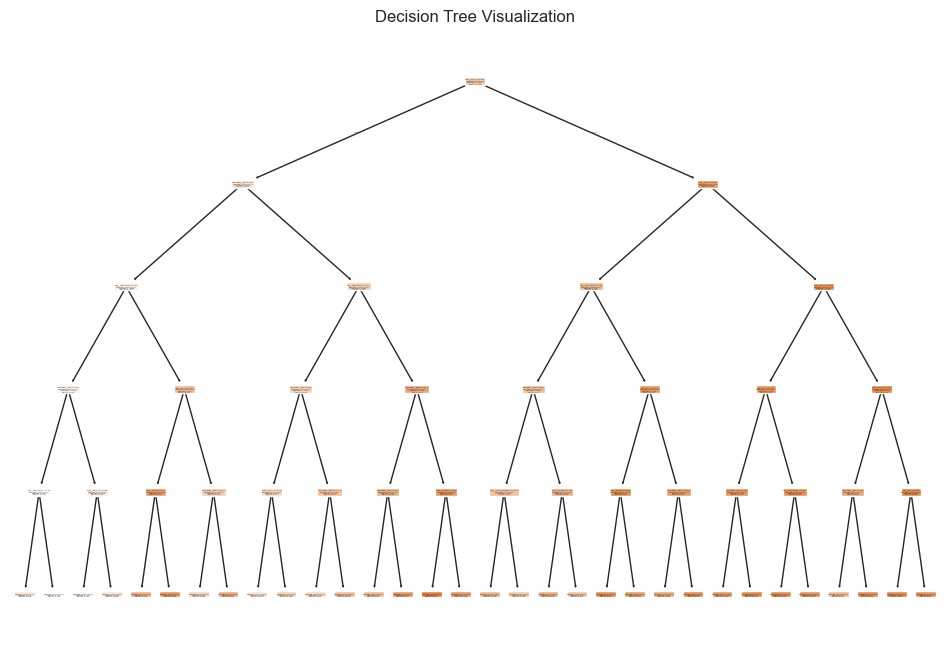

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Initialize the regression tree
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=5)

# Fit the model to the training data
reg_tree.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = reg_tree.predict(X_test_processed)

# Round predictions to convert regression outputs to binary classification
y_pred_class = (y_pred >= 0.5).astype(int)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Evaluate using classification metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print(X_train_processed.shape)
print(len(X.columns))

# Visualize the regression tree
plt.figure(figsize=(12, 8))
feature_names = preprocessor.get_feature_names_out() # Get feature names after preprocessing
plot_tree(reg_tree, feature_names=feature_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy Score: 0.7299934464428748

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6939
           1       0.76      0.67      0.71      6794

    accuracy                           0.73     13733
   macro avg       0.73      0.73      0.73     13733
weighted avg       0.73      0.73      0.73     13733


Confusion Matrix:
[[5476 1463]
 [2245 4549]]
Mean Squared Error: 0.18441611433708088
Mean Absolute Error: 0.3661204513786131


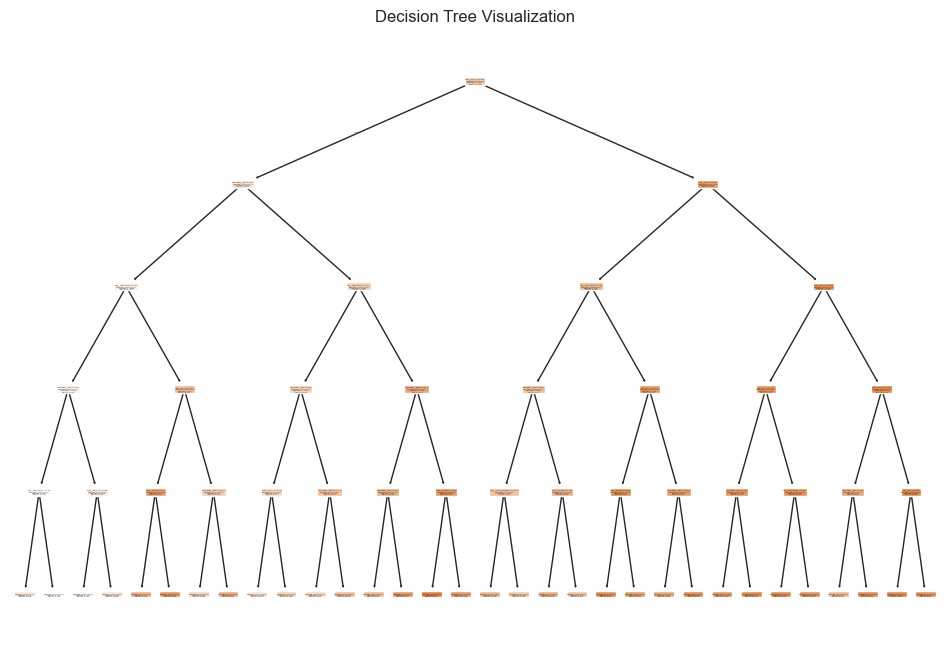

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_processed, y_train)
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

best_tree.fit(X_train_processed, y_train)

# Make predictions on test set
y_pred = best_tree.predict(X_test_processed)

# Convert regression outputs to binary classification
y_pred_class = (y_pred >= 0.5).astype(int)

# Classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy Score:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot the final decision tree
plt.figure(figsize=(12, 8))
feature_names = preprocessor.get_feature_names_out() 
plot_tree(best_tree, feature_names=feature_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

<a id="linearReg"></a>
### Linear Regression

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # Prepare data
# X = cardio_new.drop(columns=["id", "cardio", "gender"])  # Remove unnecessary columns
# y = cardio_new["cardio"]  # Target (1 = has disease, 0 = no disease)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features using StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both train and test sets
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test_processed)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Evaluate using classification metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Mean Squared Error: 0.19137205894141887
Mean Absolute Error: 0.3867306185103535
Accuracy Score: 0.7299934464428748

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6939
           1       0.76      0.67      0.71      6794

    accuracy                           0.73     13733
   macro avg       0.73      0.73      0.73     13733
weighted avg       0.73      0.73      0.73     13733


Confusion Matrix:
[[5476 1463]
 [2245 4549]]


<a id="logisticReg"></a>
### Logistic Regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# # Prepare data
# X = cardio_new.drop(columns=["id", "cardio", "gender"])  # Remove unnecessary columns
# y = cardio_new["cardio"]  # Target (1 = has disease, 0 = no disease)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features using StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both train and test sets
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_processed)

# Convert regression predictions to binary classification
y_pred_class = (y_pred >= 0.5).astype(int)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Evaluate using classification metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Mean Squared Error: 0.2732833321197116
Mean Absolute Error: 0.2732833321197116
Accuracy Score: 0.7267166678802883

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6939
           1       0.76      0.65      0.70      6794

    accuracy                           0.73     13733
   macro avg       0.73      0.73      0.72     13733
weighted avg       0.73      0.73      0.73     13733


Confusion Matrix:
[[5561 1378]
 [2375 4419]]


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train_processed, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.72528673 0.7321136  0.71927908 0.7266521  0.72771962]
Mean Cross-Validation Accuracy: 0.7262
Standard Deviation of Accuracy: 0.0042


In [28]:
# Train the model on the entire training set
log_reg.fit(X_train_processed, y_train)

# Predict and evaluate on the test set
y_pred = log_reg.predict(X_test_processed)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.7279


<a id="randomForest"></a>
## Random Forest
#### Random Forest is an advanced usage of Decision Tree.


**Recall about Decision Tree:** </br>
Decision Tree is a method of classification which makes use of a tree with each node describing a condition about some features. When it is trained, all of the samples are passed in and the classification is decided based on gini score. When a sample is passed in for testing, it is compared with each node until it reaches a leaf, from which the classification is decided.

**How does Random Forest work?** </br>
Random Forest makes use of multiple Decision Trees. First of all, the algorithm bootstraps a number of samples and features for each tree. In other words, it selects some samples and features RANDOMLY for training each tree. When a sample is used for testing, it is classified independently by every single tree. Then the classification is aggregated by voting for the majority result. This method of bootstrapping and aggregating is called BAGGING.

**How to evaluate its accuracy?** </br>
Typically, there are a number of samples that is not included in the bootstrapping. They are called Out-of-Bag dataset. The accuracy of a Random Forest model is measured by the proportion of Out-of-Bag samples that were correctly classified by the model.

**How to optimize its accuracy?** </br>
We can try to increase the accuracy score by tuning the hyperparameters. For example, we can decide on the number of trees so that the algorithm can create for training.

In [ ]:
print("\n--- Setting up Hyperparameter Tuning for Random Forest ---")

# Import necessary tools if not already imported (best practice is in Cell 1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- Define pipeline for RF ---
# Assumes 'preprocessor' variable exists from Cell 6d
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) # Base classifier
])
print("RF Pipeline defined.")

# --- Define Parameter Distribution for Randomized Search ---
param_dist_rf = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': [10, 20, 30, 40, 50, None],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 11),
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__bootstrap': [True]
}
print("Parameter distributions defined for RF.")

# --- Setup Randomized Search ---
n_iter_search_rf = 50 # Number of parameter combinations to try
cv_strategy_rf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # 3-fold CV
scoring_metric_rf = 'roc_auc' # Optimize based on AUC

print(f"Starting Randomized Search for RF (n_iter={n_iter_search_rf}, cv=3, scoring='{scoring_metric_rf}')...")
start_time = time.time()

random_search_rf = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_rf,
    n_iter=n_iter_search_rf,
    scoring=scoring_metric_rf,
    cv=cv_strategy_rf,
    n_jobs=-1, # Use all available CPU cores
    random_state=42,
    verbose=1 # Shows progress
)

# --- Fit Randomized Search ---
random_search_rf.fit(X_train, y_train)
print(f"Randomized Search complete. Took {time.time() - start_time:.2f} seconds.")

# --- Display Best Results from Search ---
print(f"\nBest {scoring_metric_rf} score found during search: {random_search_rf.best_score_:.4f}")
print("Best parameters found:")
# Store the best parameters found
best_params_rf = random_search_rf.best_params_
print(best_params_rf)

# --- Evaluate the Best Model Found by the Search on the Test Set ---
print("\n--- Evaluating Best Random Forest Model on Test Set ---")
# Get the best pipeline (preprocessor + classifier with best params)
best_rf_model = random_search_rf.best_estimator_

# Make predictions on the test set (Assumes X_test and y_test exist from Cell 6c)
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_pred_proba_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
roc_auc_rf_tuned = roc_auc_score(y_test, y_pred_proba_rf_tuned)

print(f"Tuned Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Tuned ROC AUC Score: {roc_auc_rf_tuned:.4f}")
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))
print("\nTuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

# Store results if you have a results dictionary
if 'model_results' not in locals(): model_results = {} # Initialize if needed
model_results['Random Forest (Tuned)'] = {'Accuracy': accuracy_rf_tuned, 'AUC': roc_auc_rf_tuned}

# --- Optional: Feature Importance Plot ---
print("\n--- Plotting Feature Importance (Tuned Random Forest) ---")
try:
    # Extract the fitted classifier and preprocessor steps from the best pipeline
    clf_rf_tuned = best_rf_model.named_steps['classifier']
    proc_rf_tuned = best_rf_model.named_steps['preprocessor']
    # Get feature names after preprocessing
    feature_names_rf_tuned = proc_rf_tuned.get_feature_names_out()

    importances_rf_tuned = clf_rf_tuned.feature_importances_
    indices_rf_tuned = np.argsort(importances_rf_tuned)[::-1]
    top_k = 20 # Number of top features to plot

    plt.figure(figsize=(10, 8))
    plt.title(f"Top {top_k} Feature Importances (Tuned Random Forest)")
    plt.bar(range(top_k), importances_rf_tuned[indices_rf_tuned[:top_k]], align='center')
    # Use the feature names obtained from the preprocessor
    plt.xticks(range(top_k), np.array(feature_names_rf_tuned)[indices_rf_tuned[:top_k]], rotation=90)
    plt.xlim([-1, top_k])
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
except Exception as e:
    # Corrected print statement
    print(f"Could not plot tuned RF feature importance: {e}")

<a id="neuralNetwork"></a>
## Neural Network
#### Neural network model consists of a set of algorithms that mimic the work of the human brain. 

A “neuron” in a neural network is a mathematical function which, in general, process information by responding to external inputs and passing their output to the next layer of neurons. The network learns to perform tasks by adjusting the connections (or weights) between these neurons, typically through a process known as Backpropagation. As long as we choose a good architecture, neural network performs very well in complex non-linear tasks.

**How to improve model:**
Tuning hyperparameters is the first approach to improve model. Some hyperparameters we can consider are the number of layers, and the number of neurons in each layer. Choosing appropriate loss function and optimizer also plays a vital role. Particularly, we use loss function 'sparse_categorical_crossentropy' as the target y is in the format of integers, and optimizer Adam. We can add some special layers in Hidden Layers to improve the process. In this project, we utilize BatchNormalization and Dropout layers after each Dense layers.

In [ ]:
# # --- Check if necessary variables exist ---
# # Assumes X_train, y_train, X_test, y_test and preprocessor are defined
# if ('X_train' in locals() and 'y_train' in locals() and
#     'X_test' in locals() and 'y_test' in locals() and
#     'preprocessor' in locals()):

#     print("\n--- Setting up Hyperparameter Tuning for SVC ---")

#     # Import necessary classes if not already done (best practice is Cell 1)
#     from sklearn.svm import SVC
#     from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
#     from sklearn.pipeline import Pipeline
#     from scipy.stats import loguniform, uniform # Good distributions for C and gamma

#     # --- Define SVC Pipeline ---
#     # probability=True allows using predict_proba later (for AUC, soft voting) but slows training
#     svc_pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', SVC(probability=True, random_state=42))
#     ])
#     print("SVC Pipeline defined.")

#     # --- Define Parameter Distribution for Randomized Search ---
#     param_dist_svc = {
#         # Try RBF and Linear kernels
#         'classifier__kernel': ['rbf', 'linear'],
#         # C: Regularization parameter. Larger C = less regularization. Use loguniform for wide range.
#         'classifier__C': loguniform(0.1, 100),
#         # Gamma: Kernel coefficient for 'rbf'. Use loguniform for wide range. Ignored by 'linear'.
#         'classifier__gamma': loguniform(0.001, 1)
#     }
#     print("Parameter distributions defined for SVC.")

#     # --- Setup Randomized Search ---
#     n_iter_search_svc = 30 # SVC can be slower, maybe start with fewer iterations
#     cv_strategy_svc = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # 3-fold CV
#     scoring_metric_svc = 'roc_auc' # Optimize for AUC

#     print(f"Starting Randomized Search for SVC (n_iter={n_iter_search_svc}, cv=3, scoring='{scoring_metric_svc}')...")
#     start_time = time.time()

#     random_search_svc = RandomizedSearchCV(
#         estimator=svc_pipeline,
#         param_distributions=param_dist_svc,
#         n_iter=n_iter_search_svc,
#         scoring=scoring_metric_svc,
#         cv=cv_strategy_svc,
#         n_jobs=-1, # Use all available CPU cores
#         random_state=42,
#         verbose=1 # Shows progress
#     )

#     # --- Fit Randomized Search ---
#     # This can take significantly longer than RF or XGBoost, especially with probability=True
#     random_search_svc.fit(X_train, y_train)
#     print(f"Randomized Search complete. Took {time.time() - start_time:.2f} seconds.")

#     # --- Display Best Results from Search ---
#     print(f"\nBest {scoring_metric_svc} score found during search: {random_search_svc.best_score_:.4f}")
#     print("Best parameters found:")
#     best_params_svc = random_search_svc.best_params_
#     print(best_params_svc)

#     # --- Evaluate the Best Model Found by the Search on the Test Set ---
#     print("\n--- Evaluating Best SVC Model on Test Set ---")
#     best_svc_model = random_search_svc.best_estimator_

#     # Make predictions
#     y_pred_svc_tuned = best_svc_model.predict(X_test)
#     y_pred_proba_svc_tuned = best_svc_model.predict_proba(X_test)[:, 1] # Requires probability=True

#     # Calculate metrics
#     accuracy_svc_tuned = accuracy_score(y_test, y_pred_svc_tuned)
#     roc_auc_svc_tuned = roc_auc_score(y_test, y_pred_proba_svc_tuned)

#     print(f"Tuned Accuracy: {accuracy_svc_tuned:.4f}")
#     print(f"Tuned ROC AUC Score: {roc_auc_svc_tuned:.4f}")
#     print("\nTuned Classification Report:")
#     print(classification_report(y_test, y_pred_svc_tuned))
#     print("\nTuned Confusion Matrix:")
#     print(confusion_matrix(y_test, y_pred_svc_tuned))

#     # Store results
#     if 'model_results' not in locals(): model_results = {}
#     model_results['SVC (Tuned)'] = {'Accuracy': accuracy_svc_tuned, 'AUC': roc_auc_svc_tuned}

# else:
#     print("Required variables (X_train, y_train, X_test, y_test, preprocessor) not found. Please run preceding cells.")

<a id="gxBoost"></a>
## GX Boosting
XGBoost is a machine learning algorithm known for its speed and performance in handling structured data.It works by building an ensemble of weak decision trees sequentially, where each subsequent tree corrects the errors of the previous ones. This iterative process allows XGBoost to continuously improve its predictive accuracy. XGBoost is particularly effective for classification problems due to its ability to handle complex relationships in the data, handle missing values, and prevent overfitting.

How to optimize its accuracy? </br>
We can try to increase the accuracy score by tuning the hyperparameters.

In [1]:
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    print("test")

    # --- Define XGBoost Pipeline ---
    xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(objective='binary:logistic',
                                        eval_metric='logloss', # Using logloss for internal eval
                                        use_label_encoder=False, # Recommended
                                        random_state=42))])

    # --- Hyperparameter Tuning Setup ---
    param_dist_xgb = {
        'classifier__n_estimators': randint(100, 600),
        'classifier__learning_rate': uniform(0.01, 0.3),
        'classifier__max_depth': randint(3, 10),
        'classifier__subsample': uniform(0.6, 0.4),
        'classifier__colsample_bytree': uniform(0.6, 0.4),
        'classifier__gamma': uniform(0, 0.5),
        'classifier__reg_alpha': uniform(0, 1),
        'classifier__reg_lambda': uniform(0, 2)
    }
    print("Parameter distributions defined for XGBoost.")

    n_iter_search_xgb = 50 # Number of iterations for Randomized Search
    cv_strategy_xgb = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scoring_metric_xgb = 'roc_auc' # Optimize for AUC

    print(f"Starting Randomized Search for XGBoost (n_iter={n_iter_search_xgb}, cv=3, scoring='{scoring_metric_xgb}')...")
    start_time = time.time()

    random_search_xgb = RandomizedSearchCV(
        estimator=xgb_pipeline,
        param_distributions=param_dist_xgb,
        n_iter=n_iter_search_xgb,
        scoring=scoring_metric_xgb,
        cv=cv_strategy_xgb,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    # --- Fit Randomized Search ---
    random_search_xgb.fit(X_train, y_train)
    print(f"Randomized Search complete. Took {time.time() - start_time:.2f} seconds.")

    # --- Display Best Results ---
    print(f"\nBest {scoring_metric_xgb} score found during search: {random_search_xgb.best_score_:.4f}")
    print("Best parameters found:")
    best_params_xgb = random_search_xgb.best_params_
    print(best_params_xgb)

    # --- Evaluate Best Model ---
    print("\n--- Final XGBoost Model Evaluation ---")
    final_xgb_model = random_search_xgb.best_estimator_

    y_pred_xgb = final_xgb_model.predict(X_test)
    y_pred_proba_xgb = final_xgb_model.predict_proba(X_test)[:, 1]

    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    print(f"Tuned Accuracy: {accuracy_xgb:.4f}")
    print(f"Tuned ROC AUC Score: {roc_auc_xgb:.4f}")
    print("\nTuned Classification Report:")
    print(classification_report(y_test, y_pred_xgb))
    print("\nTuned Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_xgb))

    # Store results
    if 'model_results' not in locals(): model_results = {}
    model_results['XGBoost (Tuned)'] = {'Accuracy': accuracy_xgb, 'AUC': roc_auc_xgb}

    # --- Feature Importance ---
    try:
        clf_xgb = final_xgb_model.named_steps['classifier']
        proc_xgb = final_xgb_model.named_steps['preprocessor']
        feature_names_xgb = proc_xgb.get_feature_names_out()
        importances_xgb = clf_xgb.feature_importances_
        indices_xgb = np.argsort(importances_xgb)[::-1]
        top_k = 20

        plt.figure(figsize=(10, 8))
        plt.title(f"Top {top_k} Feature Importances (Tuned XGBoost)")
        plt.bar(range(top_k), importances_xgb[indices_xgb[:top_k]], align='center')
        plt.xticks(range(top_k), np.array(feature_names_xgb)[indices_xgb[:top_k]], rotation=90)
        plt.xlim([-1, top_k])
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not plot tuned XGB feature importance: {e}")

test


NameError: name 'preprocessor' is not defined

<a id="stacking"></a>
## Model Stacking
Model Stacking (or Stacked Generalization) is an ensemble machine learning technique used to combine the predictions from multiple different models (called base models or level-0 models). It works by training a final model (called the meta-model or level-1 model) using the predictions of the base models as input features. The goal is often to achieve better performance than any single base model by learning how to best weigh or combine their individual predictions, leveraging the diverse strengths of each base model.

In [ ]:
    print("\n--- Setting up and Training Concise Stacking Classifier ---")
    start_time = time.time()

    # --- Define Base Estimator Pipelines (with best params, unfitted) ---
    rf_best_params_only = {k.split('__')[1]: v for k, v in best_params_rf.items()}
    xgb_best_params_only = {k.split('__')[1]: v for k, v in best_params_xgb.items()}

    estimators = [
        ('logreg', Pipeline([('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))])),
        ('rf_tuned', Pipeline([('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42, **rf_best_params_only))])),
        ('xgb_tuned', Pipeline([('preprocessor', preprocessor),
                                ('classifier', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                                                use_label_encoder=False, random_state=42, **xgb_best_params_only))]))
    ]

    # --- Define Meta-Model and Stacking Classifier ---
    meta_model = LogisticRegression(solver='liblinear', random_state=42)
    stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5, n_jobs=-1)

    # --- Train ---
    stacking_clf.fit(X_train, y_train)
    print(f"Stacking training took: {time.time() - start_time:.2f} seconds")

    # --- Evaluate ---
    print("\n--- Stacking Classifier Evaluation ---")
    y_pred_stack = stacking_clf.predict(X_test)
    try:
        y_pred_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]
        roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)
        print(f"Stacking ROC AUC Score: {roc_auc_stack:.4f}")
    except AttributeError:
        roc_auc_stack = None
        print("Stacking AUC not calculated (final estimator may not support predict_proba).")

    accuracy_stack = accuracy_score(y_test, y_pred_stack)
    print(f"Stacking Accuracy: {accuracy_stack:.4f}")
    print("\nStacking Classification Report:\n", classification_report(y_test, y_pred_stack))
    print("\nStacking Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

    # Store results
    if 'model_results' not in locals(): model_results = {}
    model_results['Stacking (Concise)'] = {'Accuracy': accuracy_stack, 'AUC': roc_auc_stack}

<a id="ano_det"></a>
## Anomaly Detection
Anomaly detection is the process of identifying rare items, events, or observations which raise suspicions by differing significantly from the majority of the data. These outliers, or anomalies, can indicate critical incidents such as fraud, network intrusions, or system defects, or, in the context of health, potential high-risk patients.

**Problem Context**: We aimed to detect potential high-risk cardiovascular patients who might not have a diagnosed disease yet but have abnormal health indicators that may suggest they are at risk.

Method Used:
- Local Outlier Factor (LOF): We used LOF from sklearn to identify anomalies based on specific risk factors like BMI, age, and blood pressure (ap_hi, ap_lo).
- LOF assigns a score indicating whether a data point is an outlier based on its local density compared to its neighbors.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=num_neighbors, contamination=cont_fraction)
# Select Risk Factors: BMI, ap_hi, ap_lo
riskFactor = cardio[['BMI', 'ap_hi', 'ap_lo']]
# Fit the Model on the Data and Predict Anomalies
outliers = lof.fit_predict(riskFactor)

# LOF assigns -1 for outliers (high-risk), 1 for normal points
cardio['Outlier'] = outliers

# Filter high-risk patients (outliers) who do not have cardiovascular disease
high_risk_patients = cardio[(cardio['Outlier'] == -1) & (cardio['cardio'] == 0)]

# Initialize an empty list to store patient IDs and their risk factors
risk_details = []

# Loop through the high-risk patients and check the factors causing outliers
# Reason: The purpose of the LOF model is to detect outliers without knowing which features are "causing" the outlier status.
# By interpreting these outliers based on relative abnormality (using quantiles), we can understand which factors are specifically
# contributing to the anomaly for each patient.
for index, row in high_risk_patients.iterrows():
    factors = []
    if row['BMI'] > cardio['BMI'].quantile(0.75):  # Top 25% BMI as a factor
        factors.append('BMI')
    if row['ap_hi'] > cardio['ap_hi'].quantile(0.75):  # Top 25% systolic BP (ap_hi)
        factors.append('ap_hi')
    if row['ap_lo'] > cardio['ap_lo'].quantile(0.75):  # Top 25% diastolic BP (ap_lo)
        factors.append('ap_lo')
    
    # Append patient ID and the corresponding risk factors
    if factors:
        risk_details.append({'ID': row['id'], 'Risk Factors': ', '.join(factors)})

# Convert to DataFrame for better display
risk_df = pd.DataFrame(risk_details)

# Print the result
print("Patients with Potential Risk:")
print(risk_df)

In [ ]:
# Visualizing outliers for each risk factor vs age
for val in riskFactor.columns:
    plt.figure(figsize=(10, 6))
    sb.scatterplot(x=cardio['age'], y=cardio[val], hue=cardio['Outlier'], palette={-1: 'red', 1: 'blue'})
    plt.title(f'Anomaly Detection: High-Risk Patients ({val})')
    plt.xlabel('Age')
    plt.ylabel(val)
    plt.show()